# Artificial Neural Networks (ANN)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [4]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [5]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_x_1 = LabelEncoder()
X[:,1] = labelencoder_x_1.fit_transform(X[:, 1])
labelencoder_x_2 = LabelEncoder()
X[:,2] = labelencoder_x_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [22]:
classifier = Sequential()
# añadimos las capas ocultas:
classifier.add(Dense(6, activation='relu', input_dim=72, input_shape=(16934,)))
# Añadimos una segunda capa
classifier.add(Dense(6, activation='relu'))
# añadimos la capa de salida
classifier.add(Dense(1, activation="sigmoid"))
# Compilamos la ANN
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [23]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 6)                 101610    
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 7         
Total params: 101,659
Trainable params: 101,659
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = classifier.fit(X_train, y_train, epochs=200, verbose=2)

Epoch 1/200
250/250 - 1s - loss: 0.5291 - accuracy: 0.7732
Epoch 2/200
250/250 - 0s - loss: 0.3829 - accuracy: 0.7960
Epoch 3/200
250/250 - 0s - loss: 0.2468 - accuracy: 0.8266
Epoch 4/200
250/250 - 0s - loss: 0.1818 - accuracy: 0.9358
Epoch 5/200
250/250 - 0s - loss: 0.1583 - accuracy: 0.9498
Epoch 6/200
250/250 - 0s - loss: 0.1464 - accuracy: 0.9520
Epoch 7/200
250/250 - 0s - loss: 0.1385 - accuracy: 0.9526
Epoch 8/200
250/250 - 0s - loss: 0.1331 - accuracy: 0.9528
Epoch 9/200
250/250 - 0s - loss: 0.1295 - accuracy: 0.9528
Epoch 10/200
250/250 - 0s - loss: 0.1268 - accuracy: 0.9529
Epoch 11/200
250/250 - 0s - loss: 0.1250 - accuracy: 0.9529
Epoch 12/200
250/250 - 0s - loss: 0.1237 - accuracy: 0.9529
Epoch 13/200
250/250 - 0s - loss: 0.1229 - accuracy: 0.9529
Epoch 14/200
250/250 - 0s - loss: 0.1223 - accuracy: 0.9529
Epoch 15/200
250/250 - 0s - loss: 0.1219 - accuracy: 0.9529
Epoch 16/200
250/250 - 0s - loss: 0.1217 - accuracy: 0.9529
Epoch 17/200
250/250 - 0s - loss: 0.1215 - accura

250/250 - 1s - loss: 0.0173 - accuracy: 0.9965
Epoch 138/200
250/250 - 0s - loss: 0.0173 - accuracy: 0.9965
Epoch 139/200
250/250 - 0s - loss: 0.0173 - accuracy: 0.9965
Epoch 140/200
250/250 - 1s - loss: 0.0173 - accuracy: 0.9965
Epoch 141/200
250/250 - 0s - loss: 0.0173 - accuracy: 0.9965
Epoch 142/200
250/250 - 0s - loss: 0.0173 - accuracy: 0.9965
Epoch 143/200
250/250 - 0s - loss: 0.0173 - accuracy: 0.9965
Epoch 144/200
250/250 - 0s - loss: 0.0173 - accuracy: 0.9965
Epoch 145/200
250/250 - 1s - loss: 0.0173 - accuracy: 0.9965
Epoch 146/200
250/250 - 1s - loss: 0.0173 - accuracy: 0.9965
Epoch 147/200
250/250 - 0s - loss: 0.0173 - accuracy: 0.9965
Epoch 148/200
250/250 - 0s - loss: 0.0173 - accuracy: 0.9965
Epoch 149/200
250/250 - 0s - loss: 0.0173 - accuracy: 0.9965
Epoch 150/200
250/250 - 1s - loss: 0.0173 - accuracy: 0.9965
Epoch 151/200
250/250 - 1s - loss: 0.0173 - accuracy: 0.9965
Epoch 152/200
250/250 - 1s - loss: 0.0173 - accuracy: 0.9965
Epoch 153/200
250/250 - 1s - loss: 0.0

In [25]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1595,    0],
       [ 405,    0]])

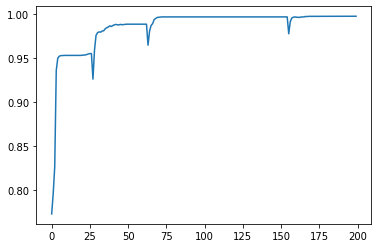

In [27]:
plt.plot(history.history["accuracy"], label="train")
plt.show()

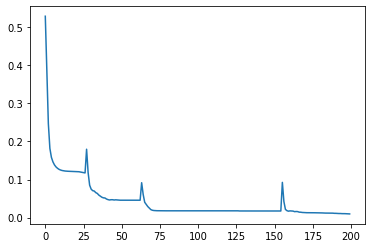

In [28]:
plt.plot(history.history["loss"], label="train")
plt.show()

In [30]:
scores = classifier.evaluate(X_train, y_train)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

250/250 [==============================] - 0s 1ms/step - loss: 0.0096 - accuracy: 0.9973

Accuracy: 99.73%
